## Setup

In [100]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

#def func1(x:float):
#    return x**2-4*x+1

#def gradient_func1(x:float):
#    return 2*x - 4

#def func2(x:float):
#    return 0.01*x**4-3*x**2+5*x+350

#def gradient_func2(x:float):
#    return 0.04*x**3-6*x+5

def random_initialize():
    x = randint(-20, 20)
    y = randint(-20,20)
    return np.meshgrid(x,y)

#def build_function1():
#    x = np.arange(-20., 20., 0.2)
#    y = np.array([func1(val) for val in x])
#    return x,y, func1, gradient_func1

#def build_function2():
#    x = np.arange(-20., 20., 0.2)
#    y = np.array([func2(val) for val in x])
#    return x,y, func2, gradient_func2

def build_function1():
    def f(x, y):
        # Scale the coefficients to increase the depth and curvature differences
        return 0.3 * (x - 10)**2 + 0.2 * (y - 10)**2 + 1 * (x + 10)**2 + 1 * (y + 10)**2

    def grad(x, y):
        # Adjusted gradient for the scaled function
        grad_x = 0.6 * (x - 10) + 2 * (x + 10)  # Increased coefficients for the gradients
        grad_y = 0.4 * (y - 10) + 2 * (y + 10)
        return np.array([grad_x, grad_y])

    x = np.linspace(-20, 20, 400)
    y = np.linspace(-20, 20, 400)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    return X, Y, Z, f, grad

def build_function3():
    def f(x, y):
        return x**2+y**2  # Z as a function of X and Y
    def grad(x, y):
        grad_x = 2*x
        grad_y = 2*y
        return np.array([grad_x, grad_y])
    x = np.linspace(-20, 20, 100)
    y = np.linspace(-20, 20, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    return X, Y, Z, f, grad


## Regular Gradient Descent

$$
\theta \leftarrow \theta - \eta \nabla_{\theta} J(\theta)
$$

Output()

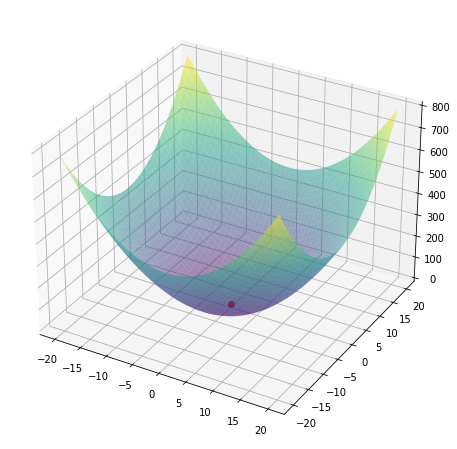

In [107]:
def step(pos, r, grad):
    pos = pos - r * grad(*pos)  
    return pos

def gradient_descent(function=build_function3, steps=1, lr=0.1, print_res=False, initialRandom=False, initialX=10, initialY=10):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 8))
    X, Y, Z, f, grad = function()
    ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')
    
    if initialRandom:
        cur_pos = random_initialize()
    else:
        cur_pos = np.array([initialX, initialY])  

    for i in range(steps):
        cur_z = f(cur_pos[0], cur_pos[1])
        ax.plot(cur_pos[0], cur_pos[1], cur_z, color="red",marker="o")
        cur_pos = step(cur_pos, r, grad)
        if print_res:
            print(f"Step {i}: X, Y = {cur_pos}, Z = {cur_z}")
    ax.set_xlim((-20,20))
    ax.set_ylim((-20,20))
    ax.set_zlim((-20,1000))
    
    plt.show()

lr_slider = widgets.FloatSlider(
    value=0.1, min=0, max=2, step=0.01, 
    description="Learning Rate",
    layout=widgets.Layout(width='100%')  # Full width of the container
)

steps_slider = widgets.IntSlider(
    value=10, min=1, max=30, step=1, 
    description="Steps",
    layout=widgets.Layout(width='100%')
)

func_dropdown = widgets.Dropdown(
    description="Function", 
    options=[('simple Function', build_function3), ('complex Fuction',build_function1) ],  # Use a list of tuples for clarity
    layout=widgets.Layout(width='50%')  # Adjust as needed based on UI considerations
)

x_slider = widgets.IntSlider(
    value=0, min=-20, max=20, step=1, 
    description="Starting X",
    layout=widgets.Layout(width='50%')
)

y_slider = widgets.IntSlider(
    value=0, min=-20, max=20, step=1, 
    description="Starting Y",
    layout=widgets.Layout(width='50%')
)

# Create a horizontal box to hold the widgets
ui = widgets.HBox([x_slider, y_slider, lr_slider, steps_slider, func_dropdown], 
                  layout=widgets.Layout(flex_flow='row wrap'))  # Wrap the content if not enough space

# Connect widgets to the function
out = widgets.interactive_output(gradient_descent, {
    'initialX': x_slider, 'initialY': y_slider, 'lr': lr_slider, 
    'steps': steps_slider, 'function': func_dropdown,
    'print_res': widgets.fixed(False), 'initialRandom': widgets.fixed(False)
})

display(ui, out)

## Momentum Optimization

$$
m \leftarrow \beta m - \eta \nabla_{\theta} J(\theta) \\
\theta \leftarrow \theta + m
$$

In [108]:
def momentum_step(pos, lr, beta, momentum, grad):
    gradient = grad(*pos)
    momentum = beta * momentum - lr * gradient
    pos = pos + momentum

    return momentum, pos

def momentum_gradient_descent(function=build_function3, steps=10, lr=0.1, beta=0.1, print_res=False, initialRandom=True, initialX=10, initialY=10):
    X, Y, Z, f, grad = function()
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 8))
    ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')

    if initialRandom:
        cur_pos = random_initialize()
    else:
        cur_pos = np.array([initialX, initialY])  # Starting position as a 2D vector

    momentum = np.zeros(2)  # Momentum as a vector
    for i in range(steps):
        cur_z = f(cur_pos[0], cur_pos[1])
        ax.scatter(cur_pos[0], cur_pos[1], cur_z, color='red', marker='o')
        momentum, cur_pos = momentum_step(cur_pos, lr, beta, momentum, grad)
        if print_res:
            print(f"Step {i}: X = {cur_pos[0]}, Y = {cur_pos[1]}, Z = {cur_z}")

lr_slider = widgets.FloatSlider(
    value=0.1, min=0, max=2, step=0.01, 
    description="Learning Rate",
    style={'description_width': 'initial'},  # Ensure description does not get cut off
    layout=widgets.Layout(width='100%')  # Full width of the container
)

steps_slider = widgets.IntSlider(
    value=10, min=1, max=30, step=1, 
    description="Steps",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='100%')
)

func_dropdown = widgets.Dropdown(
    description="Function", 
    options=[('simple Function', build_function3), ('complex Function', build_function1)],  # Use a list of tuples for clarity
    layout=widgets.Layout(width='50%')  # Adjust as needed based on UI considerations
)

x_slider = widgets.IntSlider(
    value=0, min=-20, max=20, step=1, 
    description="Starting X",
    layout=widgets.Layout(width='50%')
)

y_slider = widgets.IntSlider(
    value=0, min=-20, max=20, step=1, 
    description="Starting Y",
    layout=widgets.Layout(width='50%')
)

beta_slider = widgets.FloatSlider(
    value=0, min=-0, max=1, step=0.01, 
    description="Beta Factor",
    layout=widgets.Layout(width='50%')
)

# Create a horizontal box to hold the widgets
ui = widgets.HBox([x_slider, y_slider, lr_slider, steps_slider,beta_slider, func_dropdown], 
                  layout=widgets.Layout(flex_flow='row wrap'))  # Wrap the content if not enough space

# Connect widgets to the function
out = widgets.interactive_output(momentum_gradient_descent, {
    'initialX': x_slider, 'initialY': y_slider, 'lr': lr_slider, 
    'steps': steps_slider, 'function': func_dropdown,
    'beta': beta_slider,
    'print_res': widgets.fixed(False), 'initialRandom': widgets.fixed(False)
})

display(ui, out)

#momentum_gradient_descent(steps=30, lr=0.05, beta=0.6)


Output()

## Comparision

Regular Gradient-Descent


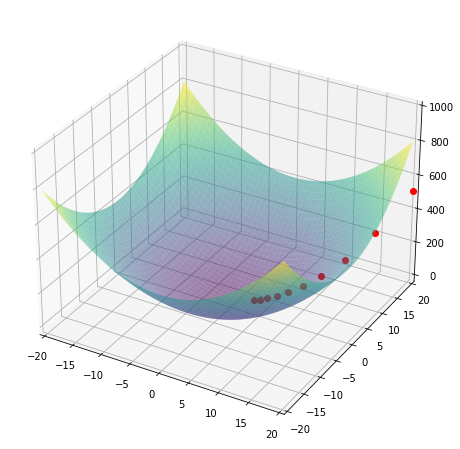

Momentum Optimization


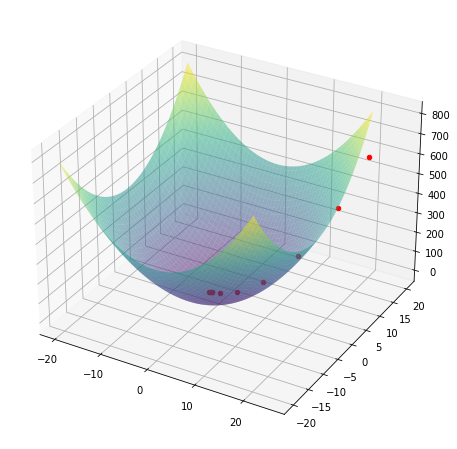

In [75]:
print("Regular Gradient-Descent")
gradient_descent(steps=10, initialRandom=False, initialX=25, print_res=False)
print("Momentum Optimization")
momentum_gradient_descent(steps=10,beta=0.5, initialRandom=False, initialX=25, print_res=False)


## Nesterov Accelerated Gradient

$$ m \leftarrow \beta m - \eta \nabla_{\theta} J(\theta + \beta m) $$
$$ \theta \leftarrow \theta + m $$